### This notebook will be used for the Assignment of week 4 of capstone course for Applied Data Science on Coursera

### Author: Rajiv Ranjan Singh

# 1. Introduction

In this project for the capstone course for Applied Data Science, we shall cluster and compare neighbourhoods in Toronto and New York City on the basis of popular venues, major crime indicators and area of the neighbourhood. At the end of the exercise, a desirable output shall be a table of similar neighbourhoods across New York and Toronto. This information shall be useful for anyone who is doing business in any of these cities and wants to expand to the other city. It shall also be useful for professionals who are looking to change jobs within New York or Toronto or from one city to another.  

## 1.1 Background

The City of New York, usually called either New York City (NYC) or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States.Located at the southern tip of the state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass and one of the world's most populous megacities. A global power city, New York City has been described as the cultural,financial and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports.

Similarly, Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 in 2016. The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. Its varied cultural institutions, which include numerous museums and galleries, festivals and public events, entertainment districts, national historic sites, and sports activities,attract over 43 million tourists each year. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

## 1.2 Problem Description

Both cities have a large and diverse population of both Toronto and New York, including . Every year hundreds of thousands of immigrants, businessmen and professionals visit, migrate to or settle in these cities for work, livelihood and tourism. Due to the large area, several neighbourhoods, income differences, and variations in quality of life from one neighbourhood to another, it is often a tedious task to find neighbouhoods suitable to one's preferences. Businessmen often need information on neighbourhood to reloacte or to open new businesses. Further, anyone moving from New York to Toronto or vie versa would want to move to more or less similar neighbourhood. Also many people prefer to avoid crime-prone areas of a city whether for residence or business. Therefore the crime data for each neighbourhood is also relevant to categorization of similar neighbourhoods.

Therefore the problem is to group neighbourhoods within and across New York and Toronto and categorize them based on popular venues, businesses, area and crime rate.

## 1.3 Target Audience

1. Businesses looking for expansion in New York and Toronto
2. Professional looking for relocation
3. Students looking for relocation
4. House buyers

## 1.4 Success criteria

A good categorization of neighbourhoods between Toronto and New York and their prominent features.

# 2. Data

For our project we will need the following data for both Toronto and New York:

1. Major Crime Indicators for each neighbourhood/precinct
2. Area, Latitude and Longitutde for each neighbourhood/precinct
3. List of popular venues for each neighbourhood/precinct

## 2.1 Data for Toronto

1. For crime statistics of Toronto we shall use the data provided <a href="https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Neighbourhood_MCI/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json">here. </a> This dataset provides a number of features including, neighbourhood name, neighbouhood id, major crime indicators from 2014-2018, average of major crimes for last 5 years, area and length of boundaries of each neighbourhood and population. For our analysis, we shall retain the data on 

    - Neighbourhood 
    - Assault_AVG
    - AutoTheft_AVG
    - BreakandEnter_AVG
    - Robbery_AVG
    - TheftOver_AVG
    - Homicide_AVG
    - Shape__Area


2. For latitude and longitude of each neighbourhood, we shall fetch the data for each neighbourhood using **'Here'** geocoder from geopy library in Python.


3. The data of venues and venue categories for each neighbourhood will be fetched using **Foursquare API**.

## 2.2 Data for New York

1. For crime statistics of New York we shall use the data provided <a href="https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/historical-crime-data/seven-major-felony-offenses-by-precinct-2000-2018.xls">here. </a> This dataset provides a number of features including precinct id, major crimes from 2001-2018. For our analysis, we shall retain the data on 

 - Precinct id 
 - Average of Crime figures from 2014 to 2018
   
Using **dataset cleaning and feature engineering**, we shall compute the average of major crimes for each precinct and rename the columns to align the dataset with toronto dataset. For further analysis, each precinct shall be treated as a neighbourhood. 

2. For location data of New York Precincts, open data available at <a href="https://data.cityofnewyork.us/api/views/kmub-vria/rows.csv?accessType=DOWNLOAD">this link</a>  will be used. This dataset provides the boundary data and shape_area for each precinct. The centroid (latitude and longitude) of each precinct will be calculated by extracting the boundary data from above dataset and used as neighbourhood latitude and longitude. Shape_area feature will be used as it is.  

*During coding, the performance of several free geocoders in fetching location data for precincts was observed to be poor as many precincts could not be located by free geocoders available in geopy.*

3. The data of venues and venue categories for each neighbourhood will be fetched using **Foursquare API**. 

# 3. Methodology

## 3.1 Data Retrieval,Cleaning and Feature Engineering

### 3.1.1 Toronto

1. First of all crime data of Toronto was retrieved from <a href="https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Neighbourhood_MCI/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json">here.</a> in json format. First, json dataset was flattened and saved as pandas Dataframe. 
>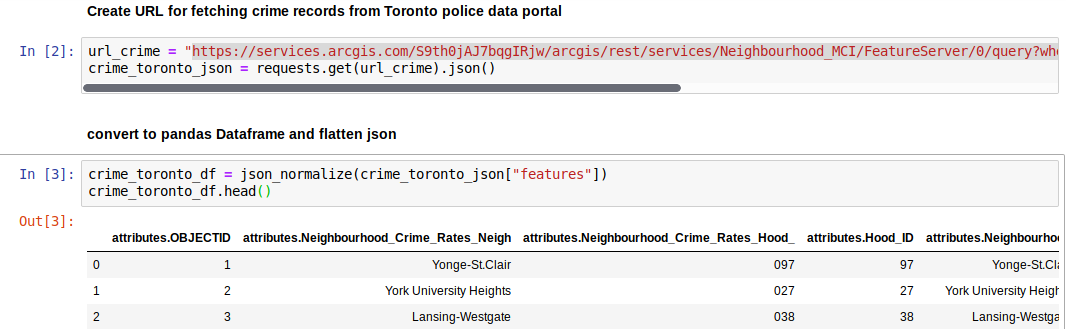

2. Then column names were cleaned and on following 8 columns were retained for further analysis.

    - Neighbourhood 
    - Assault_AVG
    - AutoTheft_AVG
    - BreakandEnter_AVG
    - Robbery_AVG
    - TheftOver_AVG
    - Homicide_AVG
    - Shape__Area
 >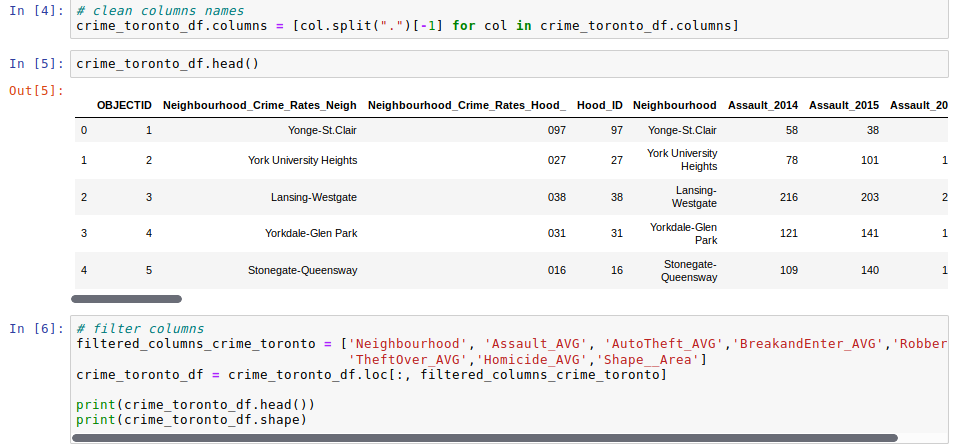   

3. It was observed that Homicide averages were 'NA' for some neighbourhoods where 0 homocides were recorded. hence 35 such values were accordingly replaced with 0 (int).

>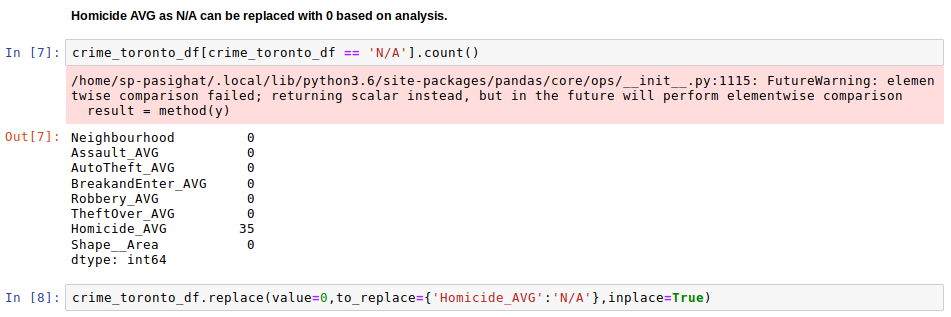

The cleaned dataframe had 140 rows and 8 columns.

4. Then latitudes and longitudes of each neighbourhood was fetched using **Geocoder** from **Geopy** package. It was observed that Nominatim geocoder was not able to give location data for all the neighbourhoods in tha dataset. After trials , it was observed that **Here** geocoder had best results among all the free geocoders enabled in Geopy. Further, in order to prevent blocking by "Here" api due to repeated calls **RateLimiter** library from Geopy was used. Using **'tqdm'** package and progress_apply function, a progress bar was used to monitor the geocoding of each neighbourhood.

>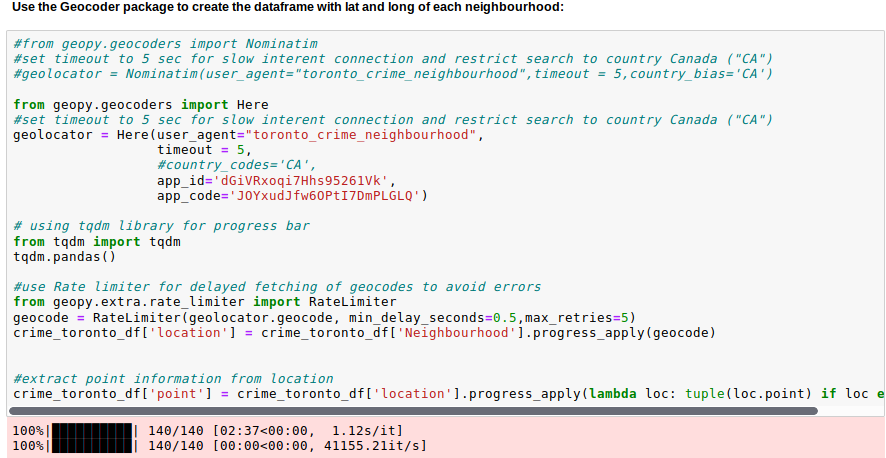

5. Finally, rows with any possible non retrived locations were dropped and cleaned dtaframe had shape of 140 X 10.

### 3.1.2 New York

1. The crime data for New York was much harder to process. We used the data provided <a href="https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/historical-crime-data/seven-major-felony-offenses-by-precinct-2000-2018.xls">here. </a> This dataset provides a number of features including precinct id, major crimes from 2001-2018 IN EXCEL FILE FORMAT. As can be seen, columns contain yearwise crime figures ffrom 2000 to 2018 while crime heads are mentioned in successive rows for each precinct. Further, only every 7th row has valid precinct ID data and intermediate cells are 'NaN' due to inability to parse merged cells from xls file. 

>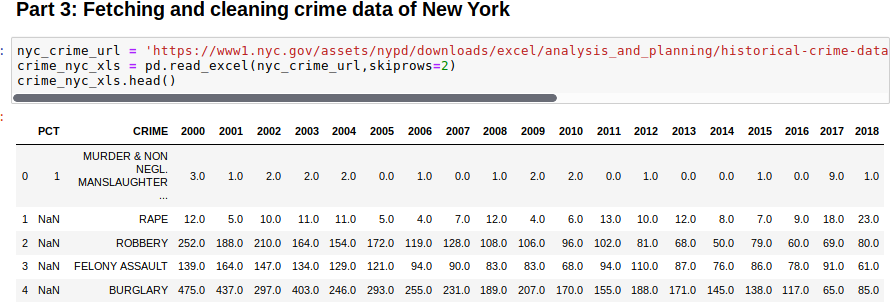

2. **Data Cleaning**: A lot of data cleaning was used to remove garbage data and get AVG of major crime heads for 2014-2018 for each precinct.

>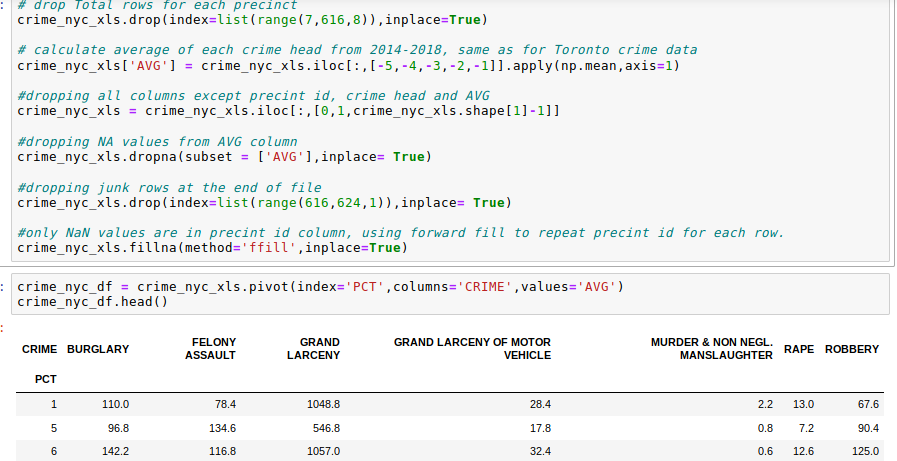

3. Finally Dataframe.pivot and renaming of columns was used to get the dataset in same order as Toronto crime data.

>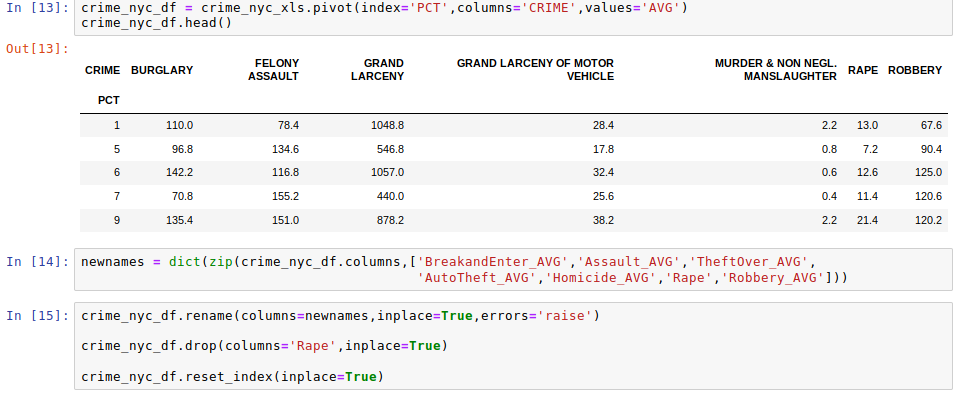

4. Since, neighbourhood wise crime data for new York was not available freely, precincts were treated as neighbourhoods. Retreving the location ( lat,long) for each precinct turned out to be difficult. The open dataset available as csv file <a href="https://data.cityofnewyork.us/api/views/kmub-vria/rows.csv?accessType=DOWNLOAD"> here.</a> It featured precinct ID, Shape_area, Shape_length and the all the locations forming the boundary geometry of each precinct. A custom function was defined to extract all the locations from boundary geometry and return the mean of latitudes and longitudes of all boundary points as the central latitude and longitude for precinct.


>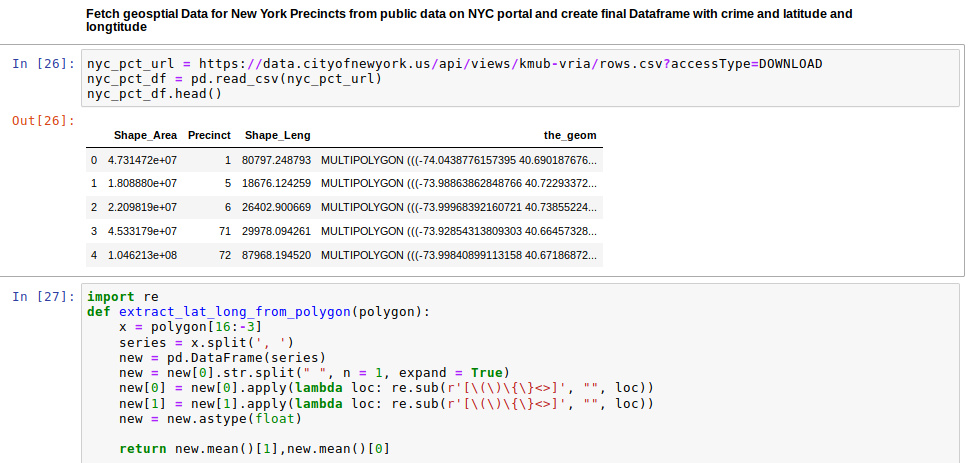


5. Finally some columns renaming and reorientation and merging with crime data of New York to get both Toronto and new York Datasets in same feature name and size.


>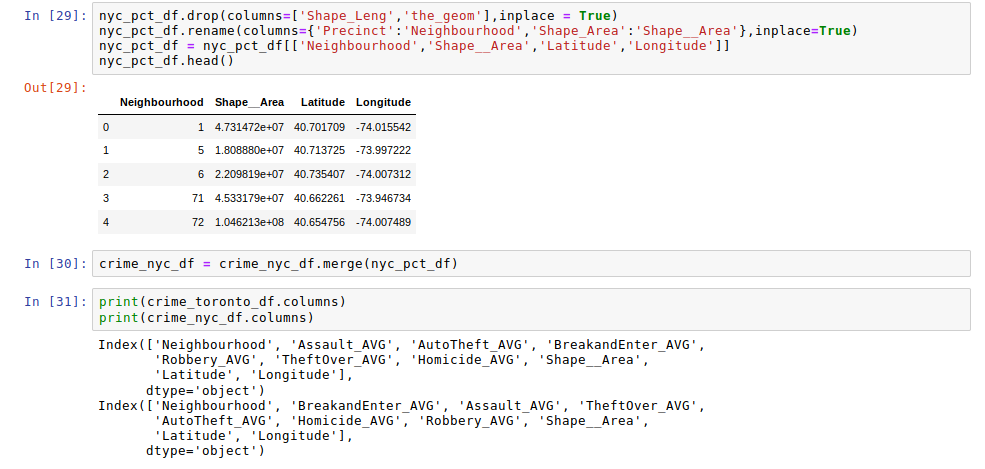

6. Finally, the central latitude and longitude for each precinct area were converted to custom neighbourhood names by using **reverse geocoding** from **Here** geocoder in geopy. The custom neighbourhood names were cleaned using regex substition. 

>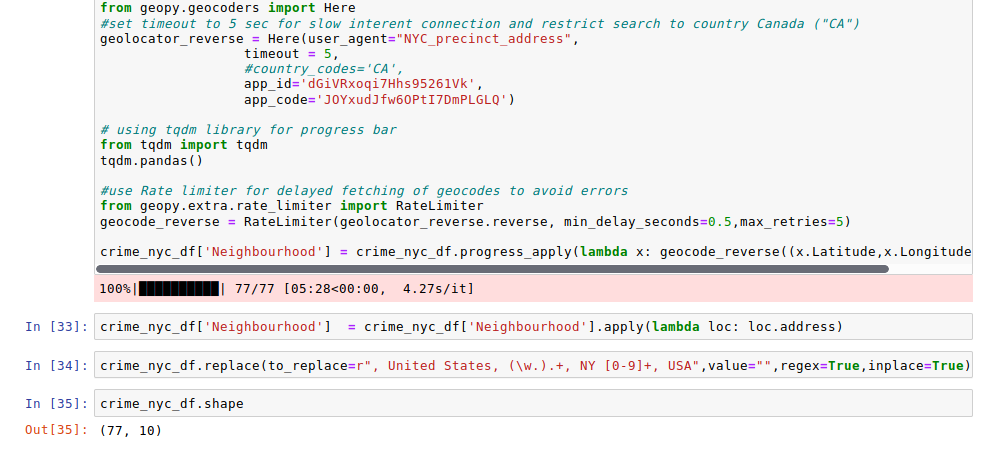

## 3.2 Exploratory Data Analysis

### 3.2.1 Toronto

1. Plot Toronto neighbourhoods on map using Nominatim and Folium

>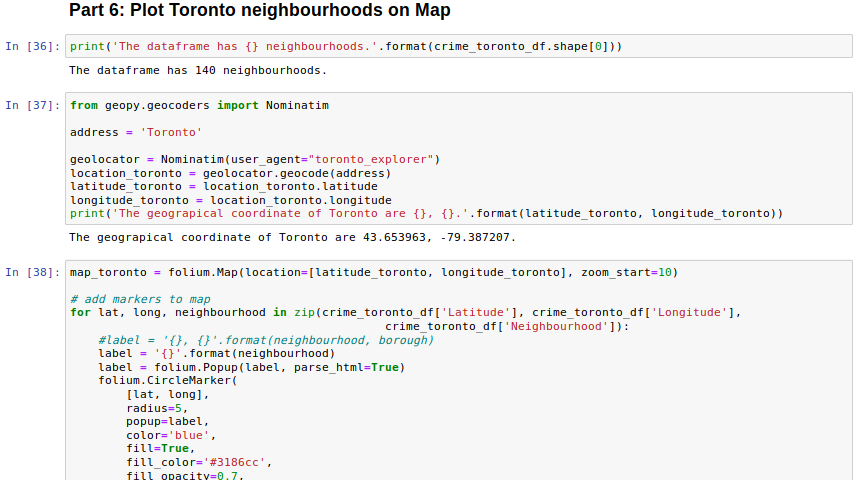

**The Toronto Neighbourhood Map**
>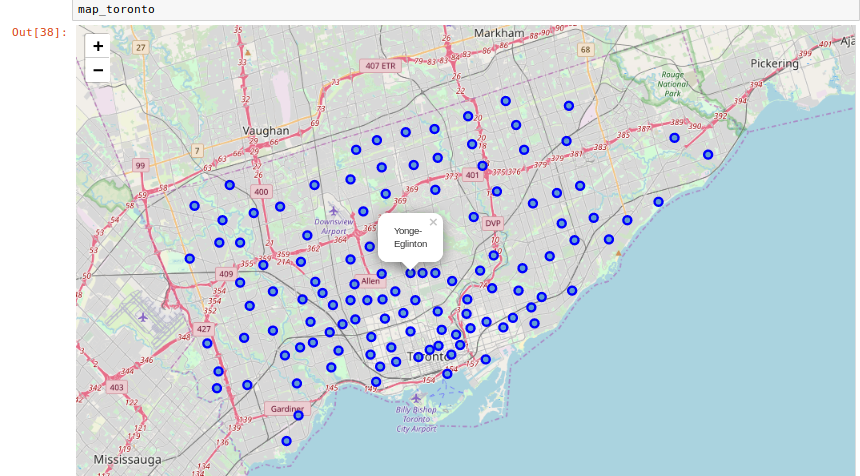

2. Similarly plot new York neighbourhoods using Folium and Nominatim

**The New York Neighbourhood Map**

>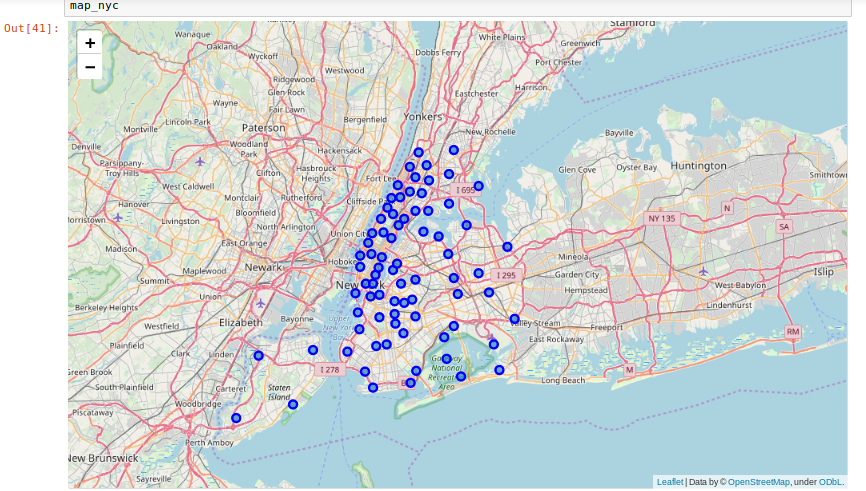

3. Explore First neighbourhood in Toronto by fetching 100 top venues within a radius of 500 m using **Foursquare** api.

>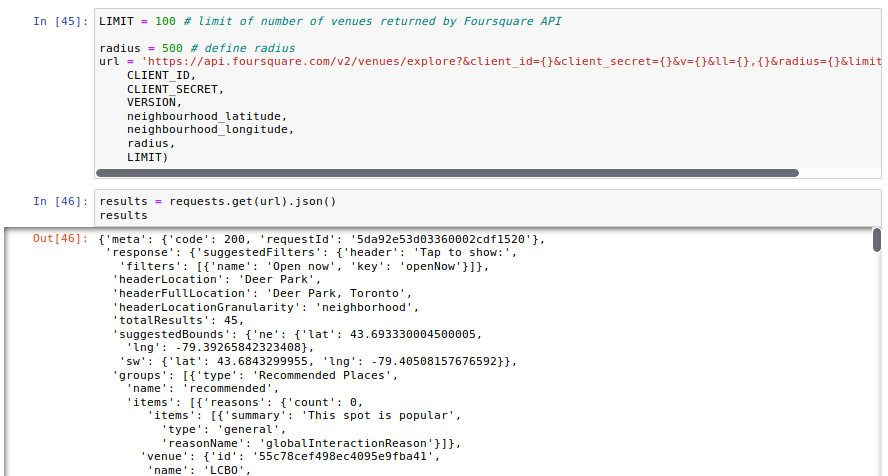

4. We can see that only 45 popular venues were returned by Foursquare for Yonge-St.Clair 
>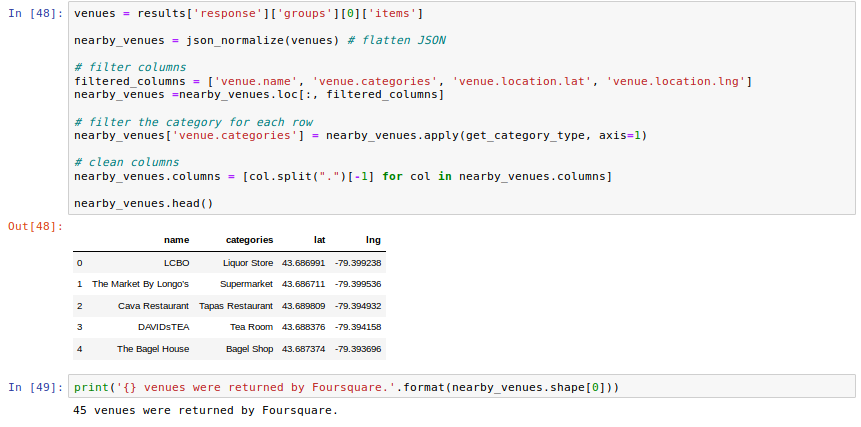

5. Define a custom function get_nearby_venues to get Venue, Venue Latitude,	Venue Longitude, Venue Category for each neighbourhood in Toronto Dataset. Apply the function to all rows of toronto dataset.

>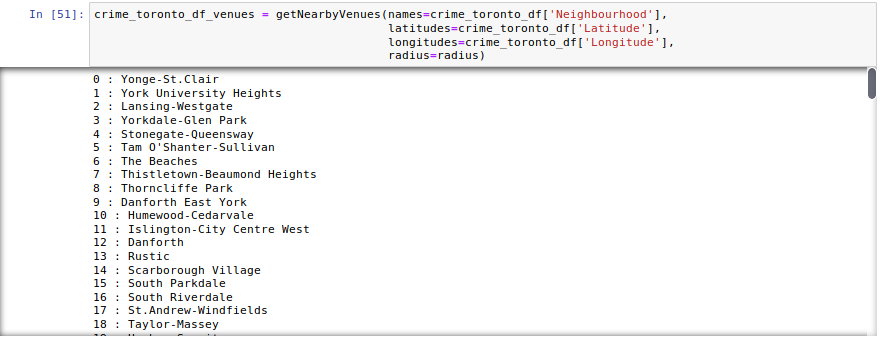

6. Check the number of venues returned for each neighbourhood and count the total number of categories of all venues in Toronto dataset. We can see that total 280 categories were returned for Toronto neighbourhood popular venues.

>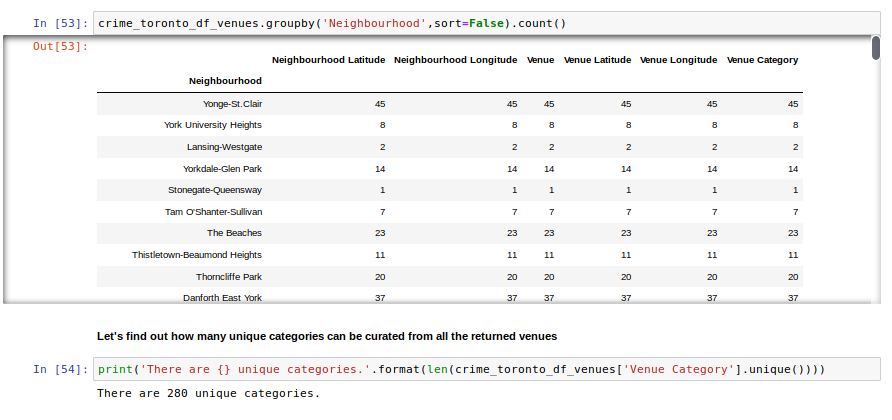

7. Plot the number of venues for each neighbourhood. We can that their is huge variation in number of venues for each neighbourhood of Toronto.

>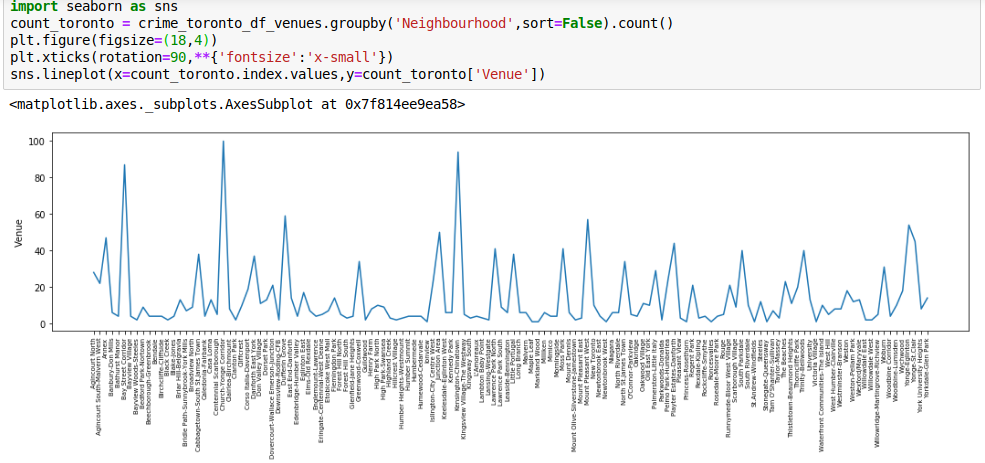

8. Converting venue category in numeric variable using One Hot Encoding( pandas dummy variables) and then grouping cateogry-wise total venues for each neighbourhood. Then this venue dataframe would be merged with crime dataset to get final dataframe ready for clustering and analysis.


>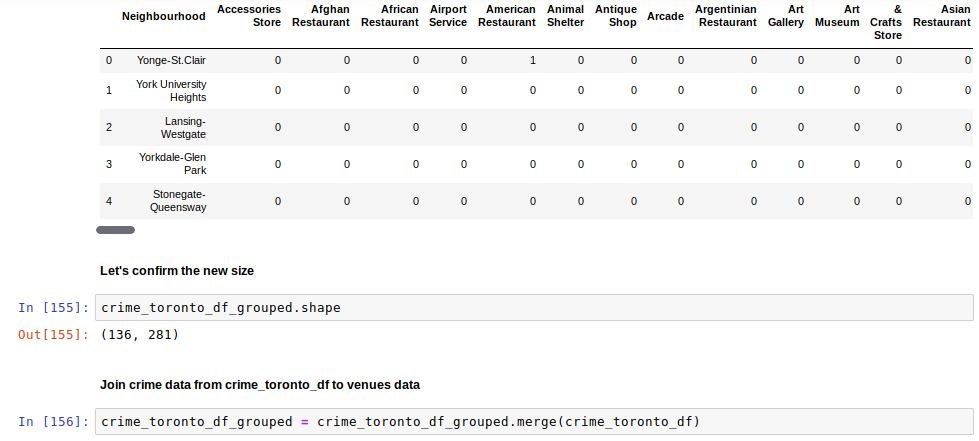

### 3.2.2 New York

1. Entire process from steps 1 to 8 is repeated for new York dataframe too beginning with getting venues using Foursquare.

>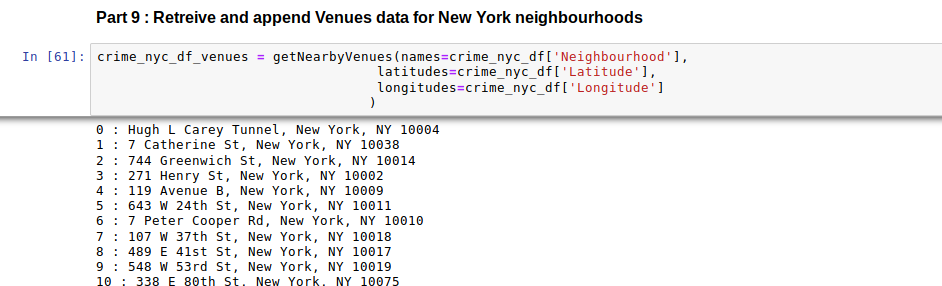

2. Final grouped dataset of crime and category wise venues for New York Neighbourhoods

>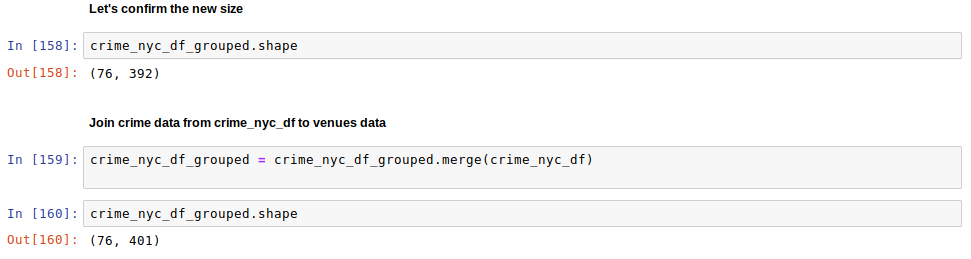

3. Plot the number of venues for each neighbourhood. We can that several neighbourhoods in New York have hit the ceiling of 100 popular venues per neighbourhood. 

>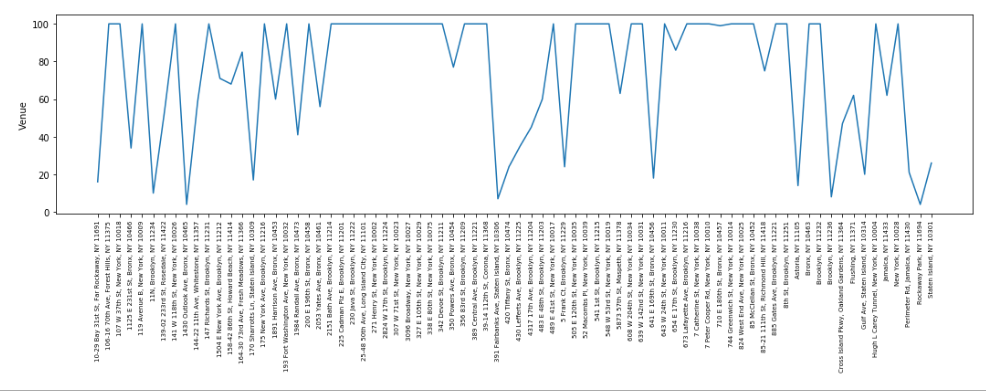

### 3.2.3 Dropping Sparse Columns of venue cateogory which are present in 2 or less than 2 neighbourhoods

   Two many features in a dataset can affect machine learning and present difficulties in proper clustering. Hence features ('venue categories') which are present (non-zero) for two or less than two neighbourhoods were dropped to condense the dataset.  

>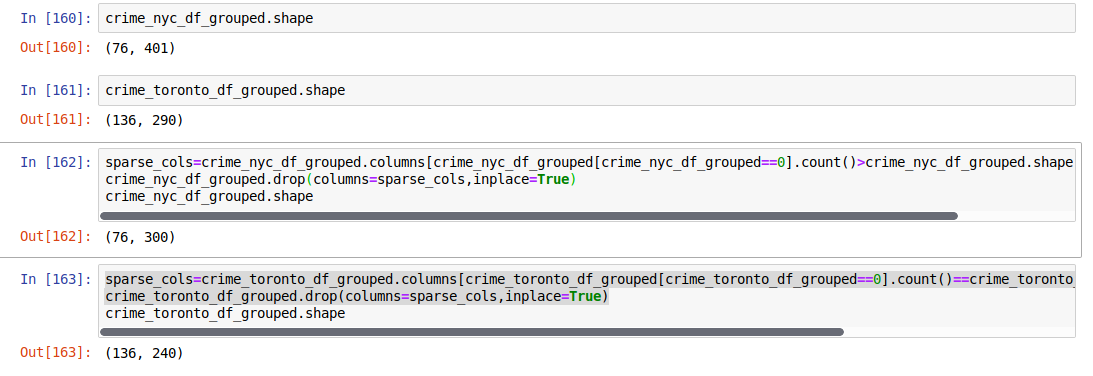

We can see that 101(401 - 300) columns were dropped from NYC dataset and 50 (290-240) columns were dropped from Toronto dataset.

## 3.3 Inferential Statistical Testing

### 3.3.1 Plotting distance matrices for Toronto and New York

1. We define a custom function to plot distance matrix of Neighbourhood Observations using cdist() function in scipy.spatial.distance library and plot the resulting distance matrix using seaborn.heatmap(). Anohter subplot is plotted that shows the heatmap of distance matrix sorted along rows and columns

>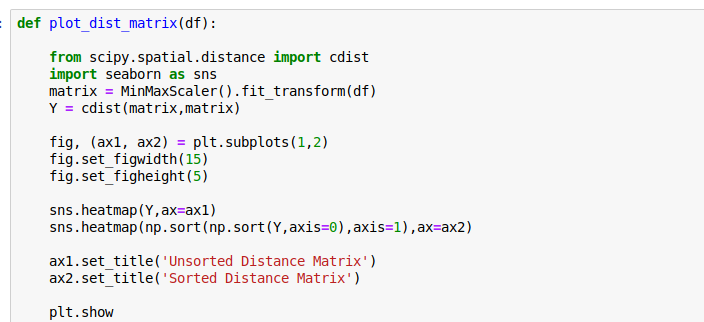

2. Plotting Toronto dataset using plot_dist_matrix

>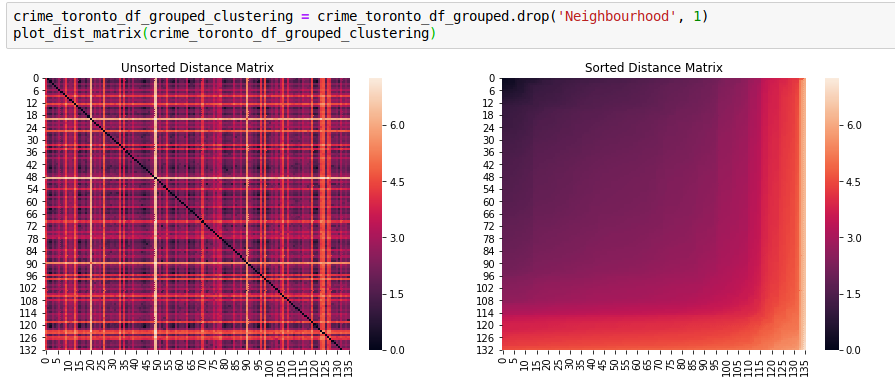

3. Plotting similar distance matrices for New York data

>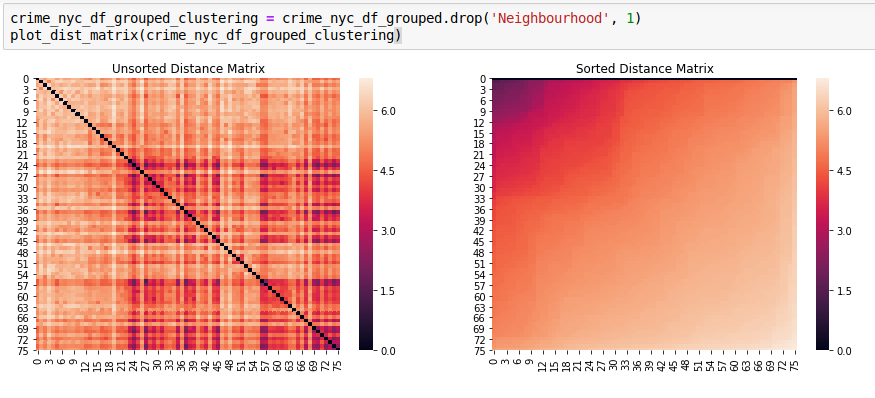

  <div class="alert alert-block alert-info">
  On comparison of distance matrix plots of New York and Toronto we can clearly observe that pairwise distances between neighbourhoods in Toronto are in much smaller range ( almost 70% in 0-3) compared to pairwise distances of New York neighbourhoods which are in a larger range ( almost 70 % in 4.5 and above). We can infer that similarity between neighbourhoods in Toronto is higher than similarity between those in New York. </div>

### 3.3.2 Finding optimum value of n_cluster for kmeans algorithm

1. Before using kmeans for clustering of similar neighbourhoods, we needs to find optimum number of clusters to get the best results. In order to find ideal number of clusters we need to run kmeans for varying range of clusters. For the purpose of this exercise, we use range of 2-15. We then define a custom function to plot silhouette scores for each test value of K. Note that features are scaled prior to clustering fit so that no features biases the distance matrix. 

>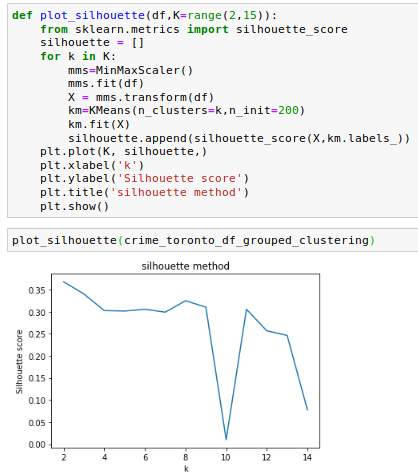

As per the graph of silhouette scores, any values cluster(K) in the range of 2-8 will give a good score. We choose kclusters to be 6 for clsuering of Toronto Neighbourhoods. 

2. Same process of plotting silhouette scores was followed for finding optimum value of n_clusters for Kmeans for New York neighbourhoods. The resulting plot is

>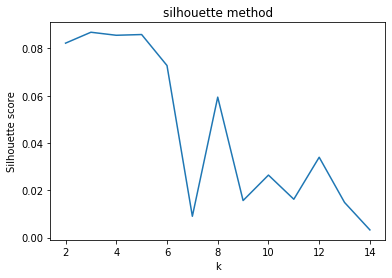

We can see that best silhouette scores are obtained for k in the range of 2 to 5. However, the best silhouette scores are not more than 0.09 which is way too low than corresponding scores for Toronto neighobourhoods ( 0.30 - 0.35). This shows that with the presently generated features , clustering for New York neighbourhoods may not be optimum. This can also be understood from the heatmap of distance matrix in section 3.3.1 (1) where we can see that very few neighbourhoods are closely located (~ few dark shades) and most of the neihgbourhoods are distant in feature space. However, for the purpose of this exercise,, we will use value of 5 for n_clusters. 



## 3.4 Machine Learning 

### 3.4.1 Clustering Toronto neighbourhoods

First of all, we cluster the neighbourhoods within the city of Toronto using kmeans. Initially, kmeans was run with parameters values:-

1. n_clusters=kclusters (6)
2. random_state=0, 
3. n_init = N_INIT(20)
4. algorithm='auto'

During code execution it was observed that clusters labels generated by kmeans were changing from run to run. This is probably because neighbourhoods are tightly packed in the feature-space as observed in the heatmap plot of distance matrix ( section 3.3.1). In order to get consistent cluster labels, we increased the n_init parameter to 200 to enable maximum possible exploration through random initialization. Also algorithm used was forced as 'full'. The documentation for sklearn.cluster.KMeans says the following:-
_**algorithm“auto”, “full” or “elkan”, default=”auto”**
_K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.used the follwing parameters for final run of KMeans.

Since our dataset is highly sparse, hence algorithm used was forced as 'full'. 

The final parameters used were as follows:-

1. n_clusters=kclusters (6)
2. random_state=0, 
3. **n_init = N_INIT(200)**
4. **algorithm='full'**

After clustering, the cluster labels were merged in Toronto neighbourhood dataset and neighbourhoods were plotted using Folium with color-coding of markers as per cluster labels.

>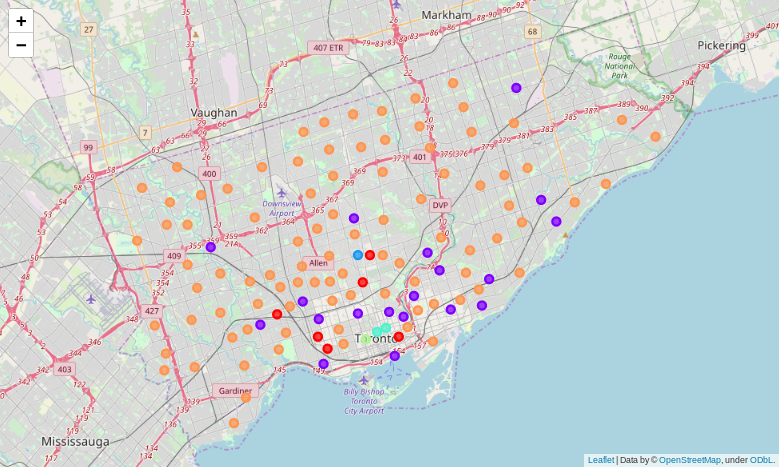

### 3.4.2 Clustering New York neighbourhoods

The Kmeans clustering of New York neighbourhoods was run with the same parameters as for Toronto neighbourhoods clustering except for n_cluster parameter. n_cluster parameter was set to 5 as determined during silhouette analysis. 


The final parameters used were as follows:-

1. n_clusters=kclusters (5)
2. random_state=0,
3. n_init = N_INIT(200)
4. algorithm='full'

After clustering, the cluster labels were merged in New York neighbourhood dataset and neighbourhoods were plotted using Folium with color-coding of markers as per cluster labels.

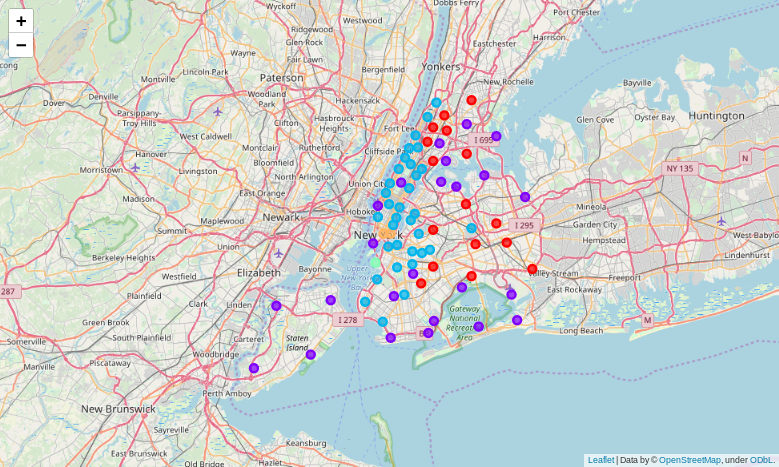

### 3.4.3 Compare Neighbourhoods between New York and Toronto

1. In order to compare and find similar neighbourhoods between New York and Toronto, we ensure that both datasets have same column names ("Venue Category") so that the two dataframes can be joined together. Therefore we find the columns ( venue categories) in present in Toronto dataframe but not present in New York dataframe ( using numpy.setdiff1d function) and add the missing columns to new York dataframe. The new columns are initialized to 0(zero).  
>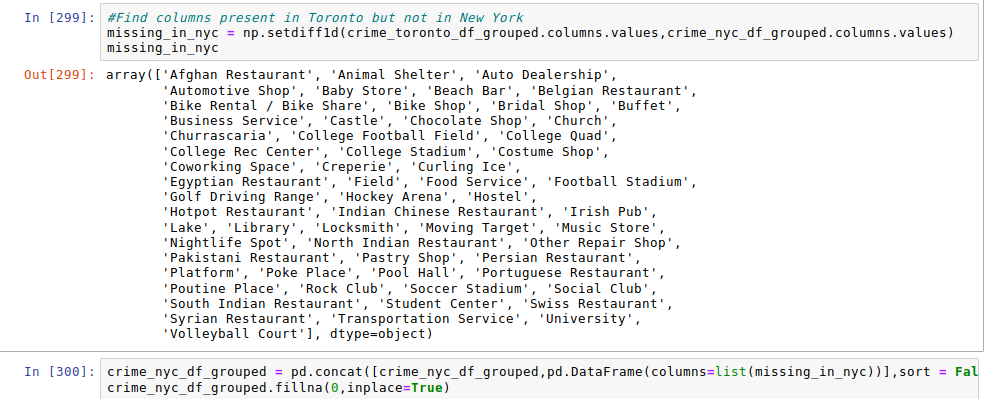

2. Same process was repeated for Toronto neighbourhood dataset too.

>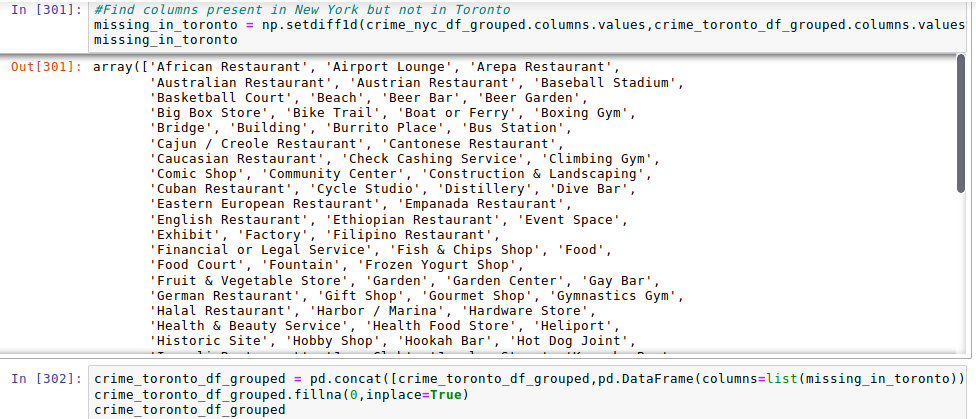

3. Some feature engineering was done. A column of city labels was added to each dtatset before conactenation. Also since latitudes and longitudes of both New York and Toronto are different ranges, centering of latitudes and longitudes of neighbourhoods in each dataset was done prior to concatenation. Centering was done by subtracting the lat/long of respective city from lat and long of each neighbourhood. Susequently sparse columns with less than two non-zero values were dropped.

>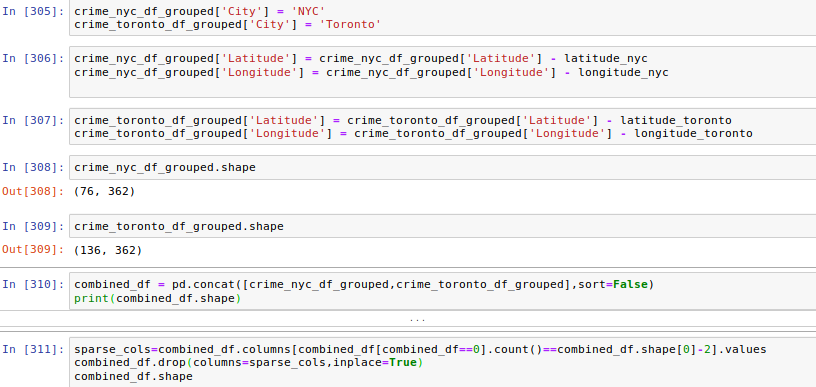

4. The final combined dataframe has a 212 rows and 326 columns.

>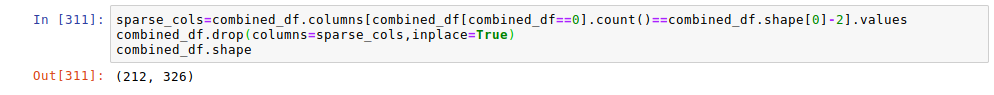

We can see that 36 sparse columns ( 362 -326) were dropped from the combined dataset.

5. Silhouette analysis for combined dataframe was done using plot_silhouette custom function with test values of n_clusters from 2-30.
>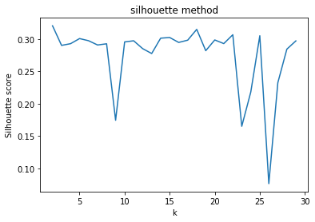

We can see from the silhoutte score plot that for k ranging between 2-20 silhouette score remain roughly between 0.28 to 0.32. However, there is a sharp drop at k values of 8. We also know that best values of K for New York dataset ranged from 2-5 only. Hence, we decide to run KMeans clustering for combined dataframe with n_cluster value of 5 only.

6. After KMeans clustering, cluster labels so obtained were merged with the combined dataframe and neighbourhoods were grouped according to cluster labels and city labels in to the follwing pivot table. IPython.html and Dataframe.style.set_properties() were used for pretty rendering of pivot table.

<table id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">Hugh L Carey Tunnel, New York, NY 10004
744 Greenwich St, New York, NY 10014
119 Avenue B, New York, NY 10009
7 Peter Cooper Rd, New York, NY 10010
107 W 37th St, New York, NY 10018
489 E 41st St, New York, NY 10017
548 W 53rd St, New York, NY 10019
338 E 80th St, New York, NY 10075
307 W 71st St, New York, NY 10023
327 E 105th St, New York, NY 10029
824 West End Ave, New York, NY 10025
3096 Broadway, New York, NY 10027
141 W 118th St, New York, NY 10026
193 Fort Washington Ave, New York, NY 10032
608 W 204th St, New York, NY 10034
356 83rd St, Brooklyn, NY 11209
654 E 17th St, Brooklyn, NY 11230
Brooklyn, NY 11232
147 Richards St, Brooklyn, NY 11231
175 New York Ave, Brooklyn, NY 11216
541 1st St, Brooklyn, NY 11215
673 Lafayette Ave, Brooklyn, NY 11216
885 Gates Ave, Brooklyn, NY 11221
389 Central Ave, Brooklyn, NY 11221
225 Cadman Plz E, Brooklyn, NY 11201
8th St, Brooklyn, NY 11251
342 Devoe St, Brooklyn, NY 11211
230 Java St, Brooklyn, NY 11222
25-48 50th Ave, Long Island City, NY 11101
106-16 70th Ave, Forest Hills, NY 11375</td>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">Church-Yonge Corridor
Kensington-Chinatown
Bay Street Corridor</td>
            </tr>
            <tr>
                        <th id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">505 E 120th St, New York, NY 10035
350 Powers Ave, Bronx, NY 10454
1984 Randall Ave, Bronx, NY 10473
85 McClellan St, Bronx, NY 10452
1891 Harrison Ave, Bronx, NY 10453
1125 E 231st St, Bronx, NY 10466
710 E 180th St, Bronx, NY 10457
2053 Yates Ave, Bronx, NY 10461
Bronx, NY 10463
200 E 196th St, Bronx, NY 10458
2824 W 17th St, Brooklyn, NY 11224
2151 Bath Ave, Brooklyn, NY 11214
483 E 48th St, Brooklyn, NY 11203
1504 E New York Ave, Brooklyn, NY 11212
85-21 111th St, Richmond Hill, NY 11418
Jamaica, NY 11433
5873 57th St, Maspeth, NY 11378
139-02 233rd St, Rosedale, NY 11422
158-42 86th St, Howard Beach, NY 11414
164-30 73rd Ave, Fresh Meadows, NY 11366
144-22 11th Ave, Whitestone, NY 11357
39-14 112th St, Corona, NY 11368</td>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">639 W 142nd St, New York, NY 10031
52 Macombs Pl, New York, NY 10039</td>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">7 Catherine St, New York, NY 10038
271 Henry St, New York, NY 10002</td>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">643 W 24th St, New York, NY 10011
New York, NY 10028
420 Tiffany St, Bronx, NY 10474
641 E 169th St, Bronx, NY 10456
1430 Outlook Ave, Bronx, NY 10465
5 Frank Ct, Brooklyn, NY 11229
11N, Brooklyn, NY 11234
4317 17th Ave, Brooklyn, NY 11204
430 Lefferts Ave, Brooklyn, NY 11225
Brooklyn, NY 11236
Rockaway Park, NY 11694
10-29 Bay 31st St, Far Rockaway, NY 11691
Cross Island Pkwy, Oakland Gardens, NY 11364
Perimeter Rd, Jamaica, NY 11430
Astoria, NY 11105
Flushing, NY 11371
Staten Island, NY 10301
Gulf Ave, Staten Island, NY 10314
391 Fairbanks Ave, Staten Island, NY 10306
170 Sharrotts Ln, Staten Island, NY 10309</td>
                        <td id="T_d228baa2_f1ca_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">Yonge-St.Clair
York University Heights
Lansing-Westgate
Yorkdale-Glen Park
Stonegate-Queensway
Tam O'Shanter-Sullivan
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Danforth East York
Humewood-Cedarvale
Islington-City Centre West
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Taylor-Massey
Humber Summit
Humbermede
Centennial Scarborough
Clairlea-Birchmount
Cliffcrest
Flemingdon Park
Corso Italia-Davenport
Ionview
Junction Area
Broadview North
Princess-Rosethorn
North Riverdale
Etobicoke West Mall
Forest Hill North
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Trinity-Bellwoods
Victoria Village
Waterfront Communities-The Island
West Hill
West Humber-Clairville
Westminster-Branson
Kennedy Park
Kingsview Village-The Westway
Bayview Woods-Steeles
Clanton Park
Keelesdale-Eglinton West
O'Connor-Parkview
Old East York
Casa Loma
Kingsway South
Runnymede-Bloor West Village
Forest Hill South
Henry Farm
Annex
Caledonia-Fairbank
Humber Heights-Westmount
Roncesvalles
University
Hillcrest Village
Mount Dennis
Dorset Park
Edenbridge-Humber Valley
Dovercourt-Wallace Emerson-Junction
Newtonbrook West
Niagara
Beechborough-Greenbrook
High Park North
High Park-Swansea
Highland Creek
North St.James Town
Oakridge
Rosedale-Moore Park
Oakwood Village
Wexford/Maryvale
Eglinton East
Elms-Old Rexdale
Agincourt North
Agincourt South-Malvern West
Englemount-Lawrence
Eringate-Centennial-West Deane
L'Amoreaux
Banbury-Don Mills
Bathurst Manor
Regent Park
Bendale
Birchcliffe-Cliffside
Weston-Pellam Park
Downsview-Roding-CFB
Lambton Baby Point
Black Creek
Willowdale East
Willowdale West
Rouge
Mount Olive-Silverstone-Jamestown
Cabbagetown-South St.James Town
Mount Pleasant East
Mount Pleasant West
Blake-Jones
Rexdale-Kipling
East End-Danforth
New Toronto
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Willowridge-Martingrove-Richview
Woburn
Woodbine-Lumsden
Bayview Village
Bedford Park-Nortown
Rockcliffe-Smythe
Bridle Path-Sunnybrook-York Mills
Don Valley Village
Weston
Lawrence Park South
Long Branch
Malvern
Dufferin Grove
Maple Leaf
Markland Wood
Steeles
Lawrence Park North
Yonge-Eglinton
Morningside
Moss Park
Little Portugal
Woodbine Corridor
Newtonbrook East
Milliken
Pleasant View
Wychwood
Leaside-Bennington
Briar Hill-Belgravia
Mimico</td>
            </tr>
    </tbody></table>

7. We can see from the table above that clusters 2 and 3 have only one neighbourhood from New York and none from Toronto. In fact all neighbourhoods of Toronto except one have been grouped in cluster 4. This could be because neighbourhoods of Toronto were much tighly packed in n-dimensional feature space compared to neighbourhood distances ( in feature space) of New York. 

### 3.4.4 Comparing various clustering algorithms on combined dataframe

We can see in previous section that performance of KMeans algorithm in finding similar neighbourhoods between New York and Toronto was not satisfactory. Hence, it was decided to a test run of all available clustering algorithms in sklearn.cluster library on the combined and compare their performance in clustering similar neighbourhoods between the two cities. 

The following algorithms were tried:-

1. MiniBatchKMeans
2. AffinityPropagation
3. MeanShift
4. SpectralClustering
5. Ward
6. AgglomerativeClustering
7. DBSCAN
8. OPTICS
9. Birch
10. GaussianMixture
11. SpectralBiclustering
12. SpectralCoclustering

The final pivot table output containing number of neighbourhoods in each cluster for two cities for each algorithm is displayed below.  

<div class="output_wrapper"><div class="out_prompt_overlay prompt" title="click to scroll output; double click to hide" style=""></div><div class="output" style=""><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningMiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">9</td>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">4</td>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">2</td>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">19</td>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">133</td>
            </tr>
            <tr>
                        <th id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">42</td>
                        <td id="T_7d25e42a_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">3</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningAffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=200, preference=-1200, verbose=False)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">1</td>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">1</td>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">1</td>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">nan</td>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">73</td>
                        <td id="T_7d25e42b_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">135</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningMeanShift(bandwidth=16.97339757396255, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row5_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row5_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row6_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row6_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row7_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row7_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row8_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row8_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row9_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row9_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row10_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row10_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row11_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row11_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row12_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row12_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row13_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row13_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row14_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row14_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row15_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row15_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row16_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row16_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row17_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row17_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">76</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">119</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row5" class="row_heading level0 row5">5</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row5_col0" class="data row5 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row5_col1" class="data row5 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row6" class="row_heading level0 row6">6</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row6_col0" class="data row6 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row6_col1" class="data row6 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row7" class="row_heading level0 row7">7</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row7_col0" class="data row7 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row7_col1" class="data row7 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row8" class="row_heading level0 row8">8</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row8_col0" class="data row8 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row8_col1" class="data row8 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row9" class="row_heading level0 row9">9</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row9_col0" class="data row9 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row9_col1" class="data row9 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row10" class="row_heading level0 row10">10</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row10_col0" class="data row10 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row10_col1" class="data row10 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row11" class="row_heading level0 row11">11</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row11_col0" class="data row11 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row11_col1" class="data row11 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row12" class="row_heading level0 row12">12</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row12_col0" class="data row12 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row12_col1" class="data row12 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row13" class="row_heading level0 row13">13</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row13_col0" class="data row13 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row13_col1" class="data row13 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row14" class="row_heading level0 row14">14</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row14_col0" class="data row14 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row14_col1" class="data row14 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row15" class="row_heading level0 row15">15</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row15_col0" class="data row15 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row15_col1" class="data row15 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row16" class="row_heading level0 row16">16</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row16_col0" class="data row16 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row16_col1" class="data row16 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106level0_row17" class="row_heading level0 row17">17</th>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row17_col0" class="data row17 col0">nan</td>
                        <td id="T_7d25e42c_f1cb_11e9_ac46_fcde56ff0106row17_col1" class="data row17 col1">1</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningSpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5, n_init=10,
                   n_jobs=None, n_neighbors=10, random_state=None)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">7</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">9</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">15</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">7</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">24</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">59</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">28</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">52</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">2</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">9</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningAgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=&lt;212x212 sparse matrix of type '&lt;class 'numpy.float64'&gt;'
	with 4076 stored elements in Compressed Sparse Row format&gt;,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=5, pooling_func='deprecated')
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">70</td>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">135</td>
            </tr>
            <tr>
                        <th id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">2</td>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">3</td>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">nan</td>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">1</td>
                        <td id="T_7d25e42e_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningAgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
                        connectivity=&lt;212x212 sparse matrix of type '&lt;class 'numpy.float64'&gt;'
	with 4076 stored elements in Compressed Sparse Row format&gt;,
                        distance_threshold=None, linkage='average', memory=None,
                        n_clusters=5, pooling_func='deprecated')
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">71</td>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">136</td>
            </tr>
            <tr>
                        <th id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">2</td>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">1</td>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">1</td>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">1</td>
                        <td id="T_7d25e42f_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningDBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=20, n_jobs=None, p=None)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e430_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e430_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e430_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e430_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">-1</th>
                        <td id="T_7d25e430_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">76</td>
                        <td id="T_7d25e430_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">136</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningOPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.1, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">-1</th>
                        <td id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">76</td>
                        <td id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">99</td>
            </tr>
            <tr>
                        <th id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">0</th>
                        <td id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">nan</td>
                        <td id="T_7d25e431_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">37</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningBirch(branching_factor=50, compute_labels=True, copy=True, n_clusters=5,
      threshold=0.5)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">27</td>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">5</td>
            </tr>
            <tr>
                        <th id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">11</td>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">1</td>
            </tr>
            <tr>
                        <th id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">5</td>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">17</td>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">130</td>
            </tr>
            <tr>
                        <th id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">16</td>
                        <td id="T_7d25e432_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningGaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">3</td>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">nan</td>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">3</td>
            </tr>
            <tr>
                        <th id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">72</td>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">132</td>
            </tr>
            <tr>
                        <th id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">1</td>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">nan</td>
                        <td id="T_7e6e5722_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">1</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningSpectralBiclustering(init='k-means++', method='bistochastic', mini_batch=False,
                     n_best=50, n_clusters=5, n_components=250, n_init=10,
                     n_jobs=None, n_svd_vecs=None, random_state=None,
                     svd_method='randomized')
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">22</td>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">133</td>
            </tr>
            <tr>
                        <th id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">21</td>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">nan</td>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">1</td>
            </tr>
            <tr>
                        <th id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">nan</td>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">2</td>
            </tr>
            <tr>
                        <th id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">33</td>
                        <td id="T_885f6c94_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningSpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=5,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=None,
                     svd_method='randomized')
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><style type="text/css">
    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row0_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row0_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row1_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row1_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row2_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row2_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row3_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row3_col1 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row4_col0 {
            white-space:  pre-wrap;
        }    #T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row4_col1 {
            white-space:  pre-wrap;
        }</style><table id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">17</td>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">130</td>
            </tr>
            <tr>
                        <th id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">13</td>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">8</td>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">6</td>
            </tr>
            <tr>
                        <th id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">21</td>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">nan</td>
            </tr>
            <tr>
                        <th id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">17</td>
                        <td id="T_885f6c95_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table></div></div></div><div style="display: none;" class="btn btn-default output_collapsed" title="click to expand output">. . .</div></div>


On comparing the summary tables of clustering done by various algorithms, we can see that almost all the clustering algorithms cluster most of the neighbourhoods in one or two clusters with 99% of Toronto neighbourhoods being clubbed in one cluster. DBSCAN algorithm which does not take any initial value of n_clusters and tries to find inherent cluster structure classifies all neighbourhoods of both New York and Toronto in one cluster.

**However, SpectralClustering produces the most granular clustering with all the clusters containing some neighbourhoods of both cities New York and Toronto. The results of SpectralClustering are repoduced below.**

</tbody></table></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout"><pre>RunningSpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5, n_init=10,
                   n_jobs=None, n_neighbors=10, random_state=None)
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_html rendered_html"><table id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">7</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">9</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">15</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">7</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">24</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">59</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">28</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">52</td>
            </tr>
            <tr>
                        <th id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">2</td>
                        <td id="T_7d25e42d_f1cb_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">9</td>
            </tr>

### 3.4.5 Inductive Clustering

1. When the result of clustering naturally induces functions for classification on the whole space of interest, the method is called that of inductive clustering. In contrast, a method is called non-inductive, if it does not induce such a function. Many clustering algorithms are not inductive and so cannot be directly applied to new data samples without recomputing the clustering, which may be intractable. Instead, we can use clustering to then learn an inductive model with a classifier.

2. For this exercise, we shall use Inductive Clustering of Agglomerative clustering and KneighboursClassifier. First step was to use AgglomerativeClustering model on New York dataframe to generate cluster labels for New York data. Then a sequence of Aggomerative clustering and KneighboursClassifier was used to predict the cluster labels for Toronto neighbourhoods. 

3. The parameters finalised for Agglomerative Clustering after fine-tuning the models are as follows:-
    - n_clusters=5
    - affinity  ='cosine'
    - connectivity= kneighbors_graph
    - linkage = 'complete'
    - compute_full_tree=True
    
4. The significance of above parameter is as follows:-
    - **complete** linkage minimizes the maximum distance between observations of pairs of clusters
    - **connecitivity** constraints are useful to impose a certain local structure (only adjacent clusters can be merged together)
    - **cosine** distance works because it is invariant to global scalings of the signal
    - **compute_full_tree** was forced as True. This is because the documentation for AgglomerativeClustering says when varying the number of clusters and using caching, it may be advantageous to compute the full tree.

>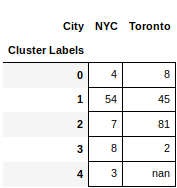

5. The cluster labels generated by Inductive Clustering were merged with combined dataframe. With Dataframe.groupby(), aggregate() and unstack() methods, a pivot table was generated classifying all the neighbourhoods of New York and Toronto.   


# 4. Results

**1. The final pivot table displaying the clustering of neighbourhoods between New York and Toronto can be seen below.**


<table id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106"><thead>    <tr>        <th class="index_name level0">City</th>        <th class="col_heading level0 col0">NYC</th>        <th class="col_heading level0 col1">Toronto</th>    </tr>    <tr>        <th class="index_name level0">Cluster Labels</th>        <th class="blank"></th>        <th class="blank"></th>    </tr></thead><tbody>
                <tr>
                        <th id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106level0_row0" class="row_heading level0 row0">0</th>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row0_col0" class="data row0 col0">2824 W 17th St, Brooklyn, NY 11224<br/>
Gulf Ave, Staten Island, NY 10314<br/>
391 Fairbanks Ave, Staten Island, NY 10306<br/>
170 Sharrotts Ln, Staten Island, NY 10309<br/></td>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row0_col1" class="data row0 col1">Stonegate-Queensway<br/>
Keelesdale-Eglinton West<br/>
Casa Loma<br/>
High Park-Swansea<br/>
Downsview-Roding-CFB<br/>
Willowdale West<br/>
Don Valley Village<br/>
Woodbine Corridor<br/></td>
            </tr>
            <tr>
                        <th id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106level0_row1" class="row_heading level0 row1">1</th>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row1_col0" class="data row1 col0">Hugh L Carey Tunnel, New York, NY 10004<br/>
7 Catherine St, New York, NY 10038<br/>
744 Greenwich St, New York, NY 10014<br/>
271 Henry St, New York, NY 10002<br/>
119 Avenue B, New York, NY 10009<br/>
7 Peter Cooper Rd, New York, NY 10010<br/>
107 W 37th St, New York, NY 10018<br/>
107 W 37th St, New York, NY 10018<br/>
489 E 41st St, New York, NY 10017<br/>
338 E 80th St, New York, NY 10075<br/>
307 W 71st St, New York, NY 10023<br/>
New York, NY 10028<br/>
327 E 105th St, New York, NY 10029<br/>
824 West End Ave, New York, NY 10025<br/>
505 E 120th St, New York, NY 10035<br/>
3096 Broadway, New York, NY 10027<br/>
141 W 118th St, New York, NY 10026<br/>
639 W 142nd St, New York, NY 10031<br/>
52 Macombs Pl, New York, NY 10039<br/>
193 Fort Washington Ave, New York, NY 10032<br/>
608 W 204th St, New York, NY 10034<br/>
350 Powers Ave, Bronx, NY 10454<br/>
420 Tiffany St, Bronx, NY 10474<br/>
1984 Randall Ave, Bronx, NY 10473<br/>
85 McClellan St, Bronx, NY 10452<br/>
1891 Harrison Ave, Bronx, NY 10453<br/>
1125 E 231st St, Bronx, NY 10466<br/>
710 E 180th St, Bronx, NY 10457<br/>
2053 Yates Ave, Bronx, NY 10461<br/>
Bronx, NY 10463<br/>
200 E 196th St, Bronx, NY 10458<br/>
2151 Bath Ave, Brooklyn, NY 11214<br/>
483 E 48th St, Brooklyn, NY 11203<br/>
654 E 17th St, Brooklyn, NY 11230<br/>
430 Lefferts Ave, Brooklyn, NY 11225<br/>
Brooklyn, NY 11232<br/>
1504 E New York Ave, Brooklyn, NY 11212<br/>
147 Richards St, Brooklyn, NY 11231<br/>
175 New York Ave, Brooklyn, NY 11216<br/>
673 Lafayette Ave, Brooklyn, NY 11216<br/>
885 Gates Ave, Brooklyn, NY 11221<br/>
389 Central Ave, Brooklyn, NY 11221<br/>
342 Devoe St, Brooklyn, NY 11211<br/>
230 Java St, Brooklyn, NY 11222<br/>
85-21 111th St, Richmond Hill, NY 11418<br/>
Jamaica, NY 11433<br/>
5873 57th St, Maspeth, NY 11378<br/>
139-02 233rd St, Rosedale, NY 11422<br/>
158-42 86th St, Howard Beach, NY 11414<br/>
164-30 73rd Ave, Fresh Meadows, NY 11366<br/>
25-48 50th Ave, Long Island City, NY 11101<br/>
144-22 11th Ave, Whitestone, NY 11357<br/>
106-16 70th Ave, Forest Hills, NY 11375<br/>
Perimeter Rd, Jamaica, NY 11430<br/>
Flushing, NY 11371<br/></td>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row1_col1" class="data row1 col1">Yonge-St.Clair<br/>
The Beaches<br/>
Thorncliffe Park<br/>
Danforth East York<br/>
Humewood-Cedarvale<br/>
South Parkdale<br/>
South Riverdale<br/>
Church-Yonge Corridor<br/>
Flemingdon Park<br/>
Corso Italia-Davenport<br/>
Junction Area<br/>
Etobicoke West Mall<br/>
Greenwood-Coxwell<br/>
Trinity-Bellwoods<br/>
West Humber-Clairville<br/>
Kensington-Chinatown<br/>
Annex<br/>
University<br/>
Hillcrest Village<br/>
Highland Creek<br/>
North St.James Town<br/>
Wexford/Maryvale<br/>
Elms-Old Rexdale<br/>
Agincourt North<br/>
Agincourt South-Malvern West<br/>
Regent Park<br/>
Weston-Pellam Park<br/>
Bay Street Corridor<br/>
Cabbagetown-South St.James Town<br/>
Mount Pleasant West<br/>
East End-Danforth<br/>
Palmerston-Little Italy<br/>
Playter Estates-Danforth<br/>
Woburn<br/>
Woodbine-Lumsden<br/>
Bayview Village<br/>
Weston<br/>
Long Branch<br/>
Dufferin Grove<br/>
Lawrence Park North<br/>
Yonge-Eglinton<br/>
Moss Park<br/>
Little Portugal<br/>
Wychwood<br/>
Briar Hill-Belgravia<br/></td>
            </tr>
            <tr>
                        <th id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106level0_row2" class="row_heading level0 row2">2</th>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row2_col0" class="data row2 col0">643 W 24th St, New York, NY 10011<br/>
1430 Outlook Ave, Bronx, NY 10465<br/>
5 Frank Ct, Brooklyn, NY 11229<br/>
11N, Brooklyn, NY 11234<br/>
Rockaway Park, NY 11694<br/>
10-29 Bay 31st St, Far Rockaway, NY 11691<br/>
Cross Island Pkwy, Oakland Gardens, NY 11364<br/></td>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row2_col1" class="data row2 col1">York University Heights<br/>
Lansing-Westgate<br/>
Yorkdale-Glen Park<br/>
Tam O'Shanter-Sullivan<br/>
Thistletown-Beaumond Heights<br/>
Islington-City Centre West<br/>
Scarborough Village<br/>
St.Andrew-Windfields<br/>
Taylor-Massey<br/>
Humber Summit<br/>
Humbermede<br/>
Centennial Scarborough<br/>
Clairlea-Birchmount<br/>
Cliffcrest<br/>
Ionview<br/>
Broadview North<br/>
Princess-Rosethorn<br/>
North Riverdale<br/>
Forest Hill North<br/>
Glenfield-Jane Heights<br/>
Guildwood<br/>
Victoria Village<br/>
Waterfront Communities-The Island<br/>
West Hill<br/>
Westminster-Branson<br/>
Kennedy Park<br/>
Kingsview Village-The Westway<br/>
Bayview Woods-Steeles<br/>
Clanton Park<br/>
O'Connor-Parkview<br/>
Old East York<br/>
Kingsway South<br/>
Runnymede-Bloor West Village<br/>
Forest Hill South<br/>
Henry Farm<br/>
Caledonia-Fairbank<br/>
Humber Heights-Westmount<br/>
Roncesvalles<br/>
Mount Dennis<br/>
Dorset Park<br/>
Edenbridge-Humber Valley<br/>
Dovercourt-Wallace Emerson-Junction<br/>
Newtonbrook West<br/>
Niagara<br/>
Beechborough-Greenbrook<br/>
High Park North<br/>
Oakridge<br/>
Rosedale-Moore Park<br/>
Oakwood Village<br/>
Eglinton East<br/>
Englemount-Lawrence<br/>
Eringate-Centennial-West Deane<br/>
L'Amoreaux<br/>
Banbury-Don Mills<br/>
Bathurst Manor<br/>
Bendale<br/>
Birchcliffe-Cliffside<br/>
Lambton Baby Point<br/>
Black Creek<br/>
Willowdale East<br/>
Mount Olive-Silverstone-Jamestown<br/>
Mount Pleasant East<br/>
Blake-Jones<br/>
Rexdale-Kipling<br/>
New Toronto<br/>
Parkwoods-Donalda<br/>
Pelmo Park-Humberlea<br/>
Willowridge-Martingrove-Richview<br/>
Bedford Park-Nortown<br/>
Rockcliffe-Smythe<br/>
Bridle Path-Sunnybrook-York Mills<br/>
Lawrence Park South<br/>
Maple Leaf<br/>
Markland Wood<br/>
Steeles<br/>
Morningside<br/>
Newtonbrook East<br/>
Milliken<br/>
Pleasant View<br/>
Leaside-Bennington<br/>
Mimico<br/></td>
            </tr>
            <tr>
                        <th id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106level0_row3" class="row_heading level0 row3">3</th>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row3_col0" class="data row3 col0">548 W 53rd St, New York, NY 10019<br/>
641 E 169th St, Bronx, NY 10456<br/>
Brooklyn, NY 11236<br/>
225 Cadman Plz E, Brooklyn, NY 11201<br/>
8th St, Brooklyn, NY 11251<br/>
39-14 112th St, Corona, NY 11368<br/>
Astoria, NY 11105<br/>
Staten Island, NY 10301<br/></td>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row3_col1" class="data row3 col1">Rouge<br/>
Malvern</td>
            </tr>
            <tr>
                        <th id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106level0_row4" class="row_heading level0 row4">4</th>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row4_col0" class="data row4 col0">4317 17th Ave, Brooklyn, NY 11204<br/>
356 83rd St, Brooklyn, NY 11209<br/>
541 1st St, Brooklyn, NY 11215<br/></td>
                        <td id="T_3e78299a_f2b1_11e9_ac46_fcde56ff0106row4_col1" class="data row4 col1">nan</td>
            </tr>
    </tbody></table>

**2. For interpreting the different cluster labels, seaborn library's catplot function was used to produce a barplot for each Crime_type and City. Results can be seen below**

>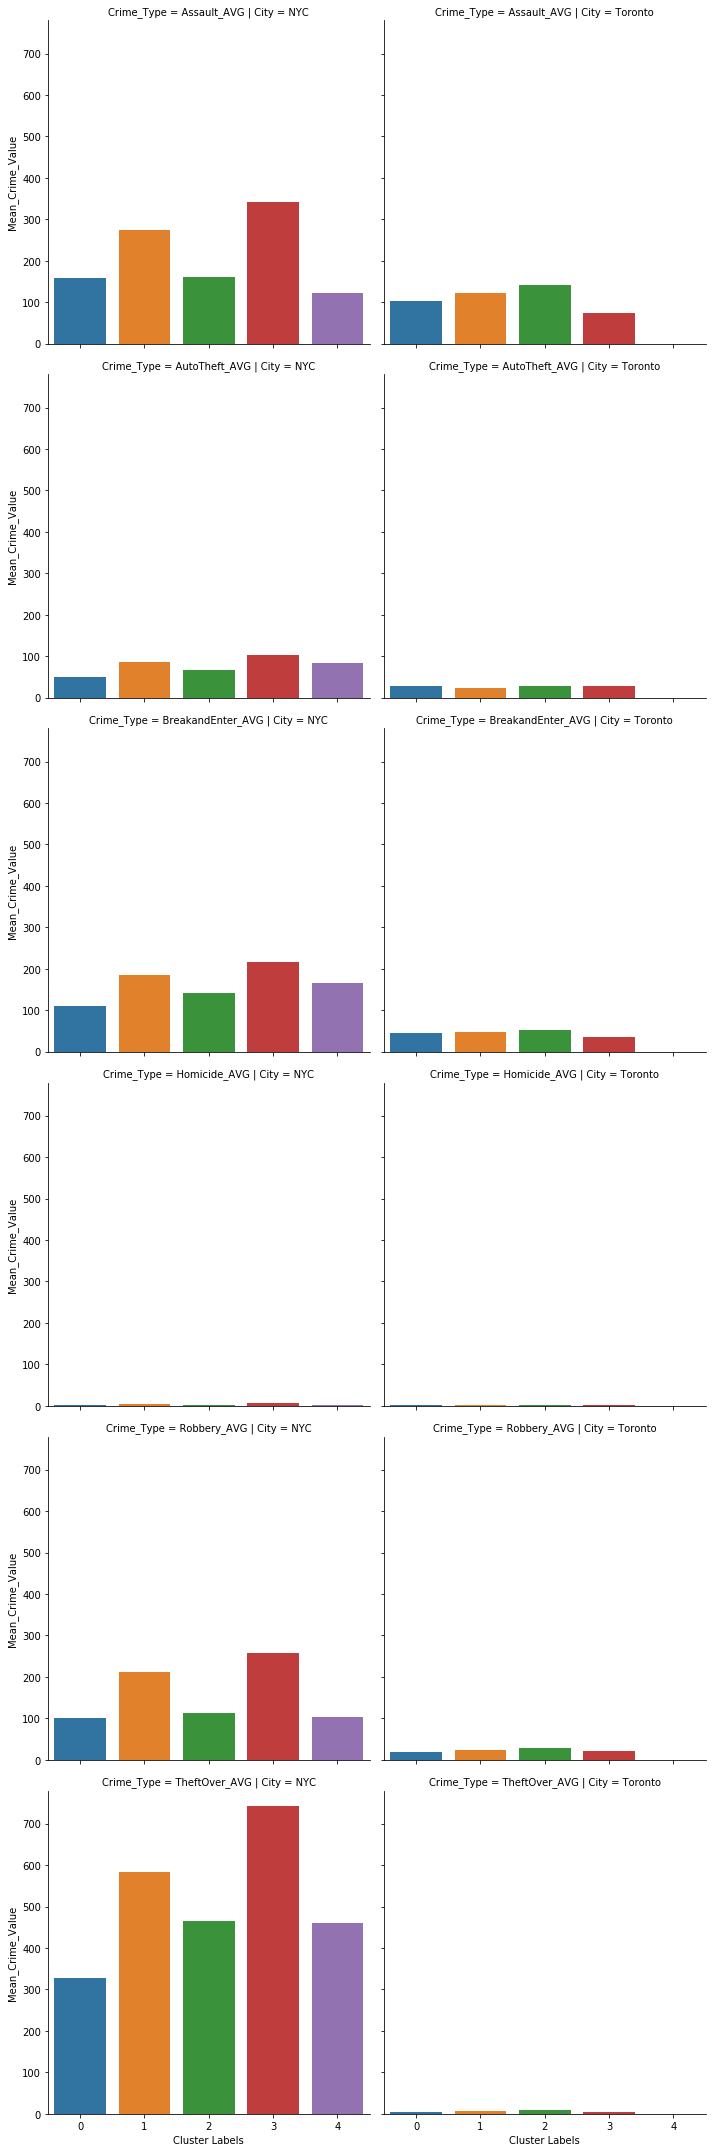

**3. On the basis of crime rates, clusters can be categorized as follows:-**
    
   - Cluster 3 - Very High Crime Rate
   - Cluster 1 - High Crime Rate
   - Cluster 2 - Moderate Crime Rate
   - Cluster 4 - Low Crime Rate
   - Cluster 0 - Very Low Crime Rate

**4. In order to categorize clusters on the basis of venues categories, following approach was used:-**

    - Fetch full category list from Foursquare using request.get() on this <a href='https://api.foursquare.com/v2/venues/categories'>url</a>
    
    - Full category list has 10 master venue categories under which all venue categories are classified.
        - Arts & Entertainment
        - College & University
        - Event
        - Food
        - Nightlife Spot
        - Outdoors & Recreation
        - Professional & Other Places
        - Residence
        - Shop & Service
        - Travel & Transport
    - Create a dictionary of Venue Categories mapped to Master Category using a custom function
    >![image.png](attachment:image.png)
    
    - Use groupby on columns of combined Dataframe to condense all venue categories columns into 10 master category columns
    - Use Seaborn.catplot() function to plot a Boxplot of distribution of various venue master categories within each cluster and city.
    

**5. The Following plot was obtained.**

>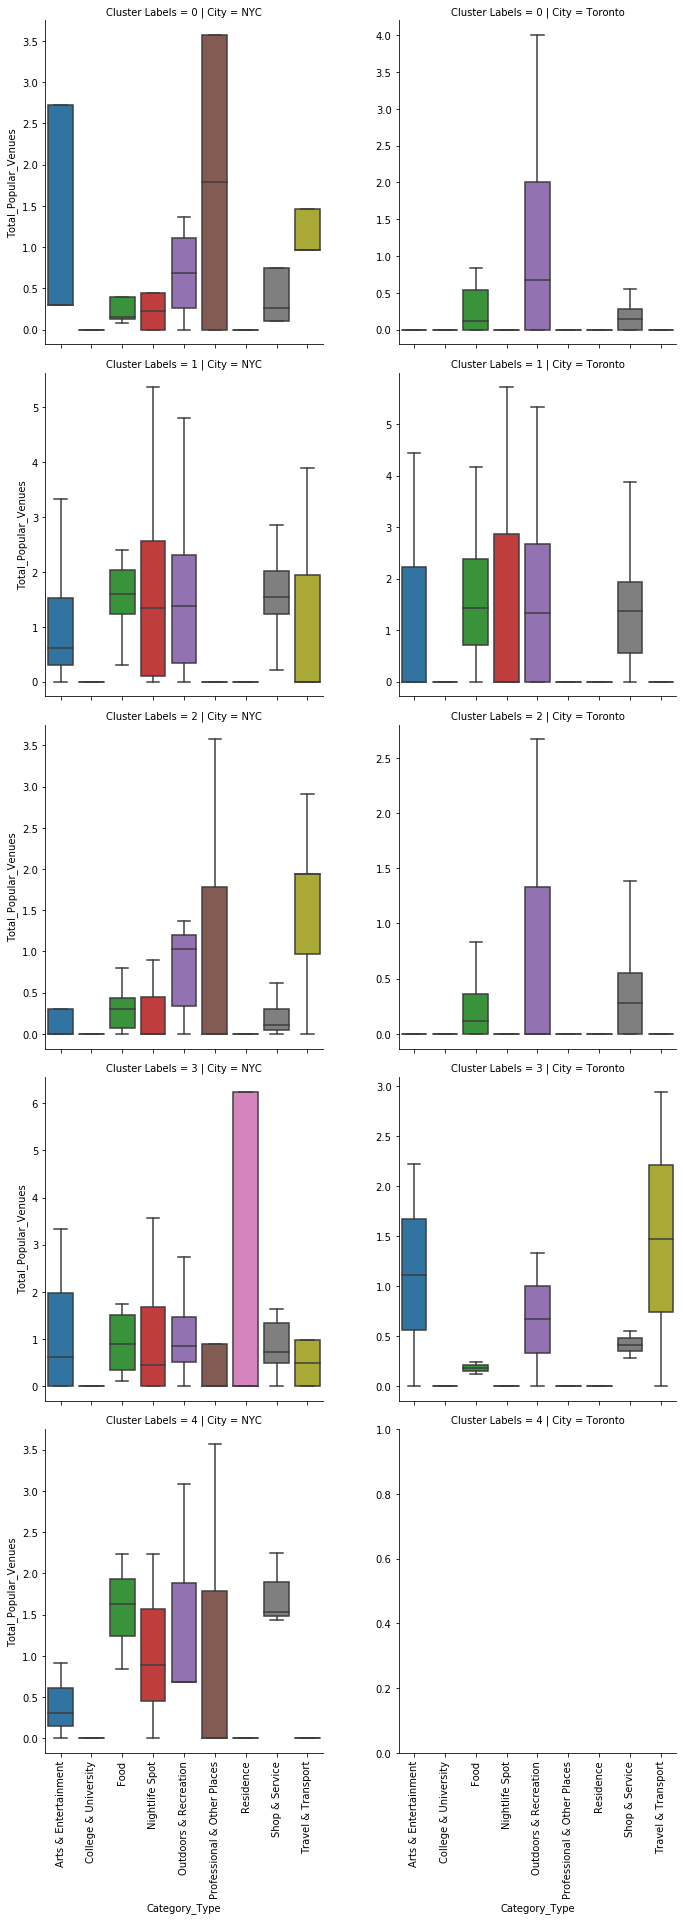

**5. On the basis of analysis of above plots, clusters can be categorized in terms of venue types as follows:-**

|Cluster Number | Category by Venue | Category by Crime        |
|---------------|-------------------|--------------------------|
|Cluster 0      | Arts & Entertainment,Professional & Other Places,Outdoors & Recreation| **(Very Low Crime Rate)**|
|Cluster 1      | Food, Nightlife Spot, Outdoors & Recreation| **(High Crime Rate)**|
|Cluster 2      | Travel & Transport, Outdoors & Recreation, Professional & Other Places| **(Moderate Crime Rate)**|
|Cluster 3      | Arts & Entertainment, Residence, Travel & Transport| **(Very High Crime Rate)**|
|Cluster 4      | Food, Shop & Service| **(Low Crime Rate)**|
    


# 5. Discussion (Observations and Recommendations)

# 6. Conclusion

### Thank you for going through my notebook.